# TESS_Localize example

Here we demo the use of the TESS_Localize package for localizing the source of variability observed by the Transiting Exoplanet Survey Satellite (TESS). This example is included in Section 4.1 of the TESS_Localize software paper, "Pulsations and Eclipses in the Light Curve of the GW Vir Star RX J2117.1+3412". This target was analyzed in more detail in [Corsico et al. 2021, A&A, 645, 117](https://ui.adsabs.harvard.edu/abs/2021A%26A...645A.117C/abstract).

In [1]:
# Import packages
import TESS_Localize as tl
import astropy.units as u
import lightkurve as lk

RX J2117.1+3412 was observed by TESS as TIC 117070953. The periodogram of the light curve revealed two sets of interesting signal frequencies: high frequency signals from stellar pulsations, and a set of low-frequency harmonics that represent binary eclipses.  It is important to test which targets on the sky these signals appear to originate from, as the large TESS pixels cause light from many stars to fall within the photometric aperture.

We measured the two sets of frequencies already with the interactive frequency analysis package [Pyriod](https://github.com/keatonb/Pyriod).

In [2]:
low_frequency_list = [9.51112996, 19.02225993, 28.53338989, 38.04451986, 
                      47.55564982, 57.06677979, 66.57790975, 76.08903972]

In [3]:
high_frequency_list = [500.559, 506.057, 642.255, 740.266, 884.017, 889.556, 
                       957.817, 963.28, 969.013, 1028.729, 1034.356, 1107.713, 
                       1212.297, 1217.872, 1223.429]

We use the lightkurve package to download the Target Pixel File data for this target, which TESS_Localize fits the source location to.

In [4]:
search_result = lk.search_targetpixelfile('TIC 117070953', sector=15)
tpf = search_result.download(quality_bitmask='default')

/Users/keatonb/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:346: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


As an optional, but sometimes necessary step, TESS_Localize can attempt to remove noise trends from the light curves extracted from each pixel using principal component analysis. There is some risk that this step could remove the signals of interest, so TESS_Localize will attempt to identify the optimal number of PCA components to use.  This step can be run either before or during the localization procedure.

/Users/keatonb/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


0


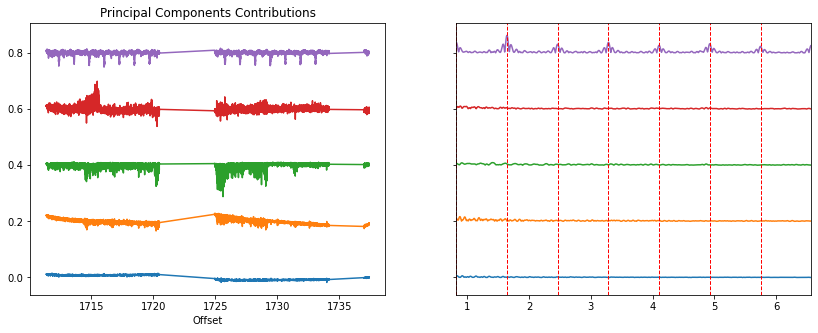

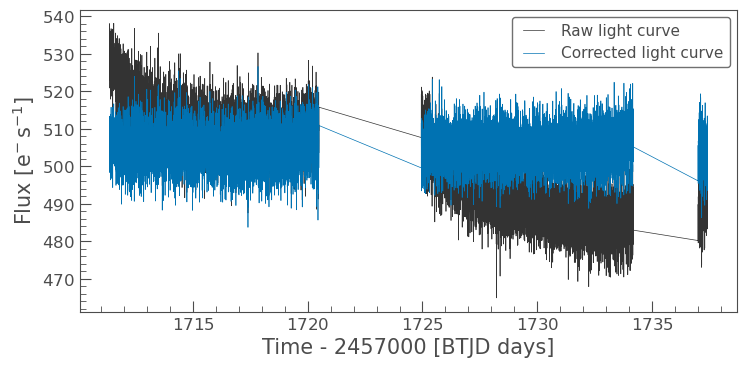

In [5]:
#Determine PCA components to use for low-frequency signals

low_pca = tl.PCA(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 5)

print(low_pca.autopca) #Recommended number of PCA components to use

low_pca.plot_pca() #Display diagnostic plots

/Users/keatonb/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/keatonb/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


5


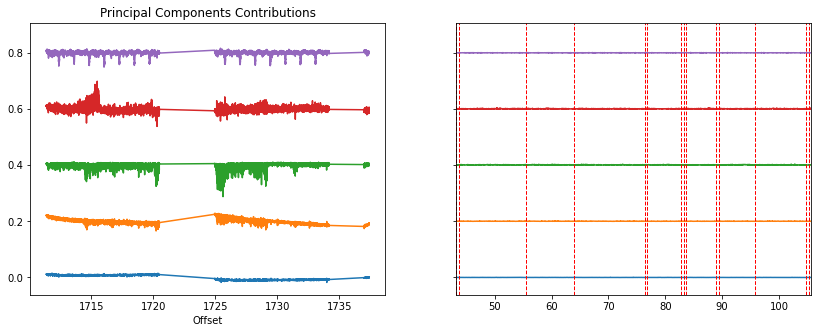

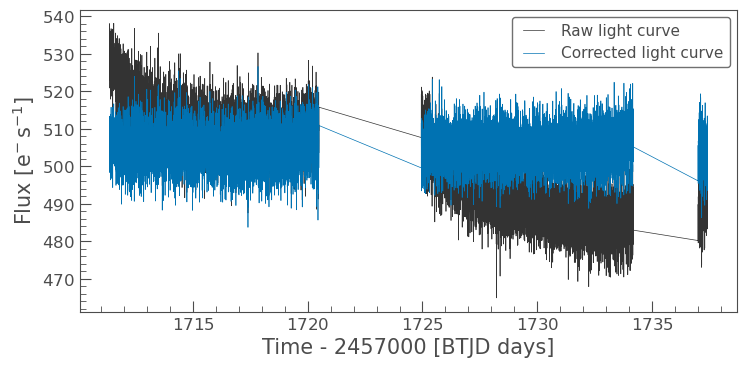

In [6]:
#Determine PCA components to use for high-frequency signals

high_pca = tl.PCA(targetpixelfile=tpf, frequencies=high_frequency_list, frequnit=u.uHz, principal_components = 5)

print(high_pca.autopca) #Recommended number of PCA components to use

high_pca.plot_pca() #Display diagnostic plots

Localizing the source of each set of signals requires only the list of frequencies of variability (with unit), the TPF lightkurve object, and the number of principal components to detrend with. Each localization may take around one minute to complete.

In [7]:
low = tl.Localize(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 0)

In [8]:
high = tl.Localize(targetpixelfile=tpf, frequencies=high_frequency_list, frequnit=u.uHz, principal_components = 'auto')

/Users/keatonb/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/keatonb/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


A summary of localization results is displayed with the `info()` function. This includes a ranked list of nearby Gaia sources with their likelihood of being the source of observed variability based on sky location.  The final best-fit location parameters are also displayed. It is important that at least one "height" parameter is found to be significant for a reliable result.  The plot that is displayed shows a combined signal-to-noise at the provided frequencies in each pixel, along with the best-fit location (black x) and nearby Gaia sources (white dots). The signal-to-noise distribution should look approximately like the distribution of light from a single point source for a reliable result.

     index          ra        dec               source          x          y  \
0       89  319.294964  34.196133  1855294415817908480   5.876951   2.998218   
1       92  319.295630  34.196130  1855294415817907840   5.961744   2.957995   
2       75  319.292226  34.192087  1855294312738692480   5.237045   2.537803   
3       98  319.291908  34.201217  1855294415817910144   5.852838   3.964698   
4       86  319.289577  34.200021  1855294312738695296   5.469589   3.919459   
..     ...         ...        ...                  ...        ...        ...   
219     91  319.318528  34.214513  1855294381458168448  10.202716   4.425977   
220     99  319.338806  34.208630  1855294553256855040  12.365883   2.308811   
221    100  319.341717  34.211391  1855294553256854912  12.935389   2.560970   
222    101  319.356889  34.205450  1855294514594056192  14.443706   0.739674   
223    223  319.241740  34.258541  1867305137241296768   3.582052  15.799980   

        Gmag    distance    likelihood 

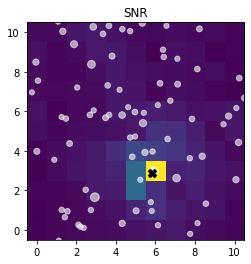

In [9]:
low.info()

     index          ra        dec               source         x          y  \
0      164  319.284473  34.207672  1855295171732158080  5.368918   5.404240   
1      166  319.283189  34.210540  1855295171732158592  5.411410   5.923105   
2       85  319.283935  34.203068  1855294312738698112  4.969312   4.726386   
3      135  319.280163  34.209637  1855295068652944128  4.960772   5.964523   
4       84  319.282486  34.202179  1855294312738698368  4.720665   4.675848   
..     ...         ...        ...                  ...       ...        ...   
219     77  319.279850  34.171883  1855294209659475328  2.205911   0.161667   
220     80  319.278908  34.172149  1855294209659475584  2.104918   0.259083   
221     82  319.281108  34.171989  1855294205359143808  2.373989   0.102886   
222     87  319.311307  34.220357  1855294450177649024  9.702034   5.758189   
223    223  319.241740  34.258541  1867305137241296768  3.582052  15.799980   

        Gmag    distance    likelihood  
0    13.04

/Users/keatonb/anaconda3/lib/python3.9/site-packages/TESS_Localize/TESS_Localize.py:759: UserWarning: Frequencies used may not all belong to the same source and provided fit could be unreliable
  warnings.warn('Frequencies used may not all belong to the same source and provided fit could be unreliable')


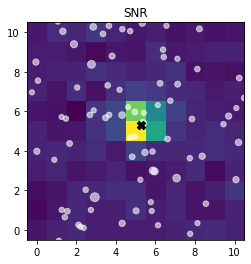

In [10]:
high.info()

It is worth inspecting the distributions of signal across pixels for individual frequencies to ensure reliable results. Here we plot the signal-to-noise ratio in each pixel for the strongest of each set of frequencies.

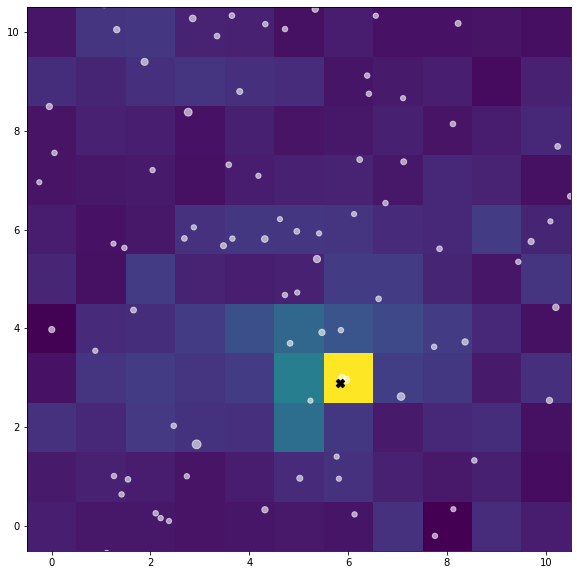

In [11]:
low.plot(frequencylist_index=2,method='snr')

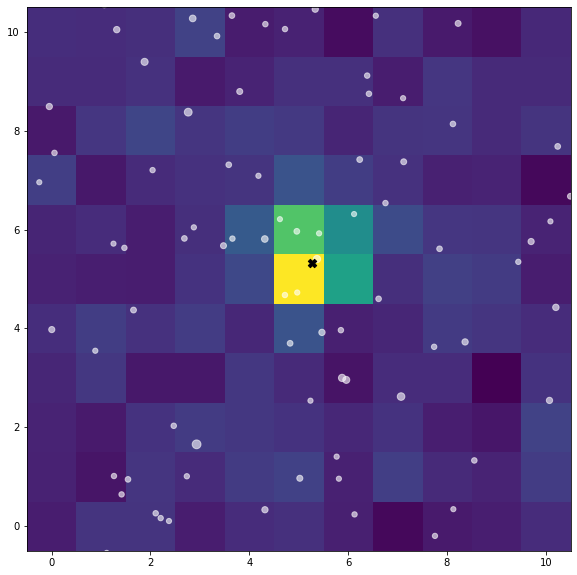

In [12]:
high.plot(frequencylist_index=4,method='snr')

Finally, we can plot the best-fit model to the light curve extracted from an individual pixel (that with the greatest signal by default), along with the light curve data.  A good fit will phase up well with the variability of interest.

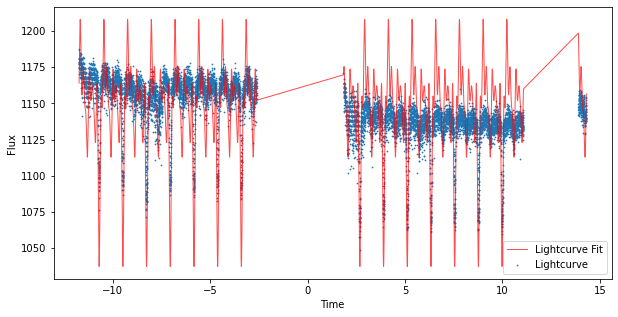

In [13]:
low.plot_lc()

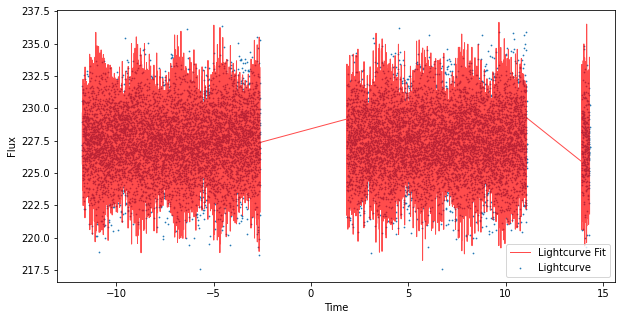

In [14]:
high.plot_lc()

The signal phases are fixed to their best-fit values to the light curve extracted from the provided aperture, which is the TESS pipeline aperture by default. In this case, the results show the eclipsing binary source to be clearly located outside the pipeline aperture, so the binary signal in the aperture is relatively weak.  We may be able to improve the localization of the eclipse signals by providing the pixel containing the strongest binary signal from the initial fit as the aperture for a refined localization.

In [15]:
low2 = tl.Localize(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 0,
                   aperture=low.maxsignal_aperture)

/Users/keatonb/anaconda3/lib/python3.9/site-packages/TESS_Localize/TESS_Localize.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if aperture =='auto':


The best-fit model to the light curve extracted from the pixel with the strongest eclipse signal is now seen to better reproduce the eclipse vatiations.

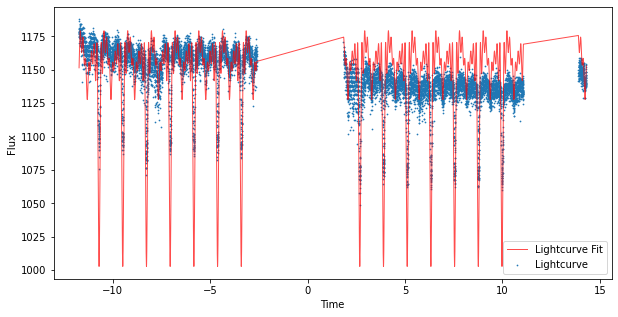

In [16]:
low2.plot_lc()

The detection significance (fitted signal "heights" relative to their uncertainties) has improved relative to the initial fit, and the precision of the localization (uncertainties on best-fit source column and row) has also improved.

     index          ra        dec               source          x          y  \
0       89  319.294964  34.196133  1855294415817908480   5.876951   2.998218   
1       92  319.295630  34.196130  1855294415817907840   5.961744   2.957995   
2       75  319.292226  34.192087  1855294312738692480   5.237045   2.537803   
3       98  319.291908  34.201217  1855294415817910144   5.852838   3.964698   
4       86  319.289577  34.200021  1855294312738695296   5.469589   3.919459   
..     ...         ...        ...                  ...        ...        ...   
219     91  319.318528  34.214513  1855294381458168448  10.202716   4.425977   
220     99  319.338806  34.208630  1855294553256855040  12.365883   2.308811   
221    100  319.341717  34.211391  1855294553256854912  12.935389   2.560970   
222    101  319.356889  34.205450  1855294514594056192  14.443706   0.739674   
223    223  319.241740  34.258541  1867305137241296768   3.582052  15.799980   

        Gmag    distance    likelihood 

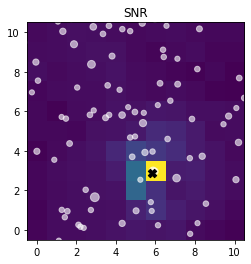

In [17]:
low2.info()